# Examples from docs

source: https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html

## Graph data container

In [1]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)

x = torch.tensor([-1, 0, 1], dtype=torch.float).unsqueeze(1)
data = Data(x=x, edge_index=edge_index)
data

Data(x=[3, 1], edge_index=[2, 4])

In [2]:
print(data['x'],'\n', data['edge_index'])

tensor([[-1.],
        [ 0.],
        [ 1.]]) 
 tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])


In [3]:
print(f'number of nodes: {data.num_nodes}\nnumber of edges: {data.num_edges}\nnumber of node features: {data.num_edge_features}\nisolated nodes: {data.has_isolated_nodes()}')

number of nodes: 3
number of edges: 4
number of node features: 0
isolated nodes: False


In [4]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = data.to(DEVICE) # can store graph at GPU if needed

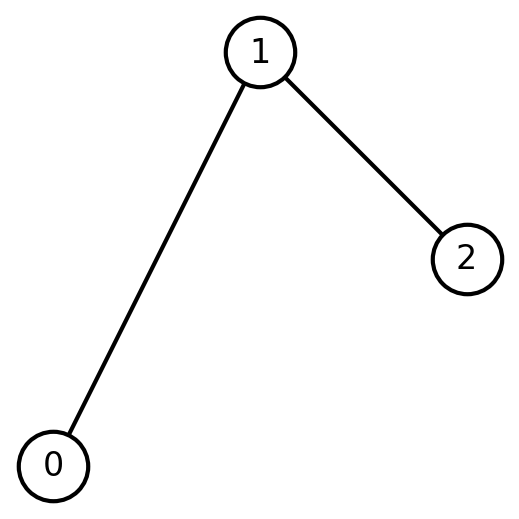

In [5]:
# Преобразование в формат для отображения
# Галерея кастомных выводов: https://networkx.org/documentation/stable/auto_examples/index.html
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils.convert import to_networkx


G = to_networkx(data=data, to_undirected=True)

pos = {
    0: (0, 0),
    1: (0.5, 0.5),
    2: (1, 0.25)
}

options = {
    "font_size": 24,
    "node_size": 2500,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
    "with_labels": True,
}

plt.figure(figsize=(5, 5))
nx.draw(G, pos,**options)

## Playable datasetes provided by pytorch_geometric

In [6]:
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='./data/ENZYMES', name='ENZYMES')
len(dataset)

Extracting data\ENZYMES\ENZYMES\ENZYMES.zip
Processing...
Done!


600

In [7]:
print(dataset.num_classes, dataset.num_node_features)

6 3


Data(edge_index=[2, 168], x=[37, 3], y=[1])


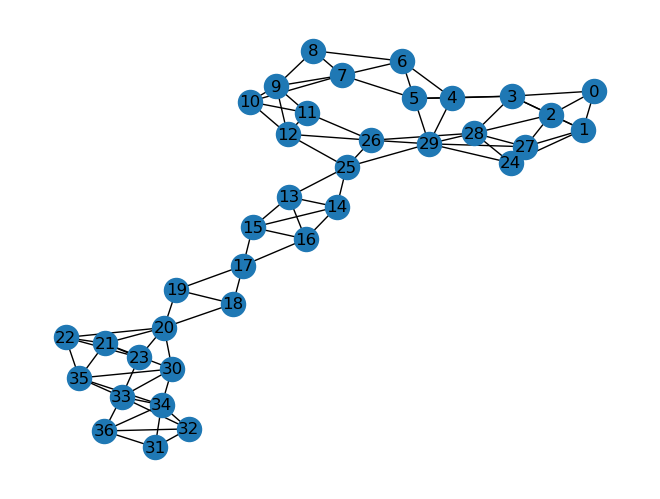

In [14]:
print(dataset[0])
nx.draw_kamada_kawai(to_networkx(dataset[0], to_undirected=True), with_labels=True)

In [16]:
# perform train/test split with shuffling
dataset = dataset.shuffle() # same as dataset[torch.randomperm(len(dataset))]
tr_size = int(len(dataset)*0.9)
train_dataset, test_dataset = dataset[:tr_size], dataset[tr_size:]
print(train_dataset, test_dataset) 

ENZYMES(540) ENZYMES(60)


## Mini-batches over graphs

In [ ]:
# TODO: